# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score

from scipy.stats import skew

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Ingest Data  

In [253]:
df = pd.read_excel('World military power.xlsx')

In [254]:
df

2020 ranking                     Unnamed: 1  Airforce Strength  \
0    Military Strength  Military Strength Power Index  Aircraft Strength   
1          Afghanistan                          1.344        Afghanistan   
2              Albania                          2.314            Albania   
3              Algeria                          0.466            Algeria   
4               Angola                          0.838             Angola   
..                 ...                            ...                ...   
134          Venezuela                          0.645          Venezuela   
135            Vietnam                          0.356            Vietnam   
136              Yemen                          1.241              Yemen   
137             Zambia                          1.646             Zambia   
138           Zimbabwe                          1.758           Zimbabwe   

                  Unnamed: 3                    Unnamed: 4  \
0    Aircraft Strength value  Fighter/Interceptor Strength   
1                        260                   Afghanistan   
2                         19                       Albania   
3                        551                       Algeria   
4                        295                        Angola   
..                       ...                           ...   
134                      260                     Venezuela   
135                      293                       Vietnam   
136                      169                         Yemen   
137                      108                        Zambia   
138                       90                      Zimbabwe   

                             Unnamed: 5                Unnamed: 6  \
0    Fighter/Interceptor Strength value  Attack Aircraft Strength   
1                                     0               Afghanistan   
2                                     0                   Albania   
3                                   103                   Algeria   
4                                    72                    Angola   
..                                  ...                       ...   
134                                  38                 Venezuela   
135                                  77                   Vietnam   
136                                  77                     Yemen   
137                                  18                    Zambia   
138                                  10                  Zimbabwe   

                         Unnamed: 7                         Unnamed: 8  \
0    Attack Aircraft Strength value  Transport Aircraft Fleet Strength   
1                                25                        Afghanistan   
2                                 0                            Albania   
3                                22                            Algeria   
4                                18                             Angola   
..                              ...                                ...   
134                               0                          Venezuela   
135                               0                            Vietnam   
136                               0                              Yemen   
137                               0                             Zambia   
138                               0                           Zimbabwe   

                                  Unnamed: 9  ...       Unnamed: 50  \
0    Transport Aircraft Fleet Strength value  ...  Total Population   
1                                         30  ...       Afghanistan   
2                                          0  ...           Albania   
3                                         59  ...           Algeria   
4                                         30  ...            Angola   
..                                       ...  ...               ...   
134                                       52  ...         Venezuela   
135                                       38  ...           Vietna

# EDA

In [255]:
df.shape

(139, 60)

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   2020 ranking       139 non-null    object
 1   Unnamed: 1         139 non-null    object
 2   Airforce Strength  139 non-null    object
 3   Unnamed: 3         139 non-null    object
 4   Unnamed: 4         139 non-null    object
 5   Unnamed: 5         139 non-null    object
 6   Unnamed: 6         139 non-null    object
 7   Unnamed: 7         139 non-null    object
 8   Unnamed: 8         139 non-null    object
 9   Unnamed: 9         139 non-null    object
 10  Unnamed: 10        139 non-null    object
 11  Unnamed: 11        139 non-null    object
 12  Unnamed: 12        139 non-null    object
 13  Unnamed: 13        139 non-null    object
 14  Unnamed: 14        139 non-null    object
 15  Unnamed: 15        139 non-null    object
 16  Land Strength      139 non-null    object
 1

In [257]:
df.head().T

0                1  \
2020 ranking                             Military Strength      Afghanistan   
Unnamed: 1                   Military Strength Power Index            1.344   
Airforce Strength                        Aircraft Strength      Afghanistan   
Unnamed: 3                         Aircraft Strength value              260   
Unnamed: 4                    Fighter/Interceptor Strength      Afghanistan   
Unnamed: 5              Fighter/Interceptor Strength value                0   
Unnamed: 6                        Attack Aircraft Strength      Afghanistan   
Unnamed: 7                  Attack Aircraft Strength value               25   
Unnamed: 8               Transport Aircraft Fleet Strength      Afghanistan   
Unnamed: 9         Transport Aircraft Fleet Strength value               30   
Unnamed: 10                         Trainer Aircraft Fleet      Afghanistan   
Unnamed: 11                   Trainer Aircraft Fleet value                0   
Unnamed: 12                      Helicopter Fleet Strength      Afghanistan   
Unnamed: 13                Helicopter Fleet Strength value              187   
Unnamed: 14               Attack Helicopter Fleet Strength      Afghanistan   
Unnamed: 15         Attack Helicopter Fleet Strength value                0   
Land Strength                                Tank Strength      Afghanistan   
Unnamed: 17                            Tank Strength value                0   
Unnamed: 18                               AFV/APC Strength      Afghanistan   
Unnamed: 19                         AFV/APC Strength value             1062   
Unnamed: 20              Self-Propelled Artillery Strength      Afghanistan   
Unnamed: 21        Self-Propelled Artillery Strength value                0   
Unnamed: 22                       Towed Artillery Strength      Afghanistan   
Unnamed: 23                 Towed Artillery Strength value              176   
Unnamed: 24                      Rocket Projector Strength      Afghanistan   
Unnamed: 25                Rocket Projector Strength value               50   
Navy Strength                         Navy Fleet Strengths      Afghanistan   
Unnamed: 27                     Navy Fleet Strengths value                0   
Unnamed: 28                Aircraft Carrier Fleet Strength      Afghanistan   
Unnamed: 29          Aircraft Carrier Fleet Strength value                0   
Unnamed: 30                       Submarine Fleet Strength      Afghanistan   
Unnamed: 31                 Submarine Fleet Strength value                0   
Unnamed: 32                       Destroyer Fleet Strength      Afghanistan   
Unnamed: 33                 Destroyer Fleet Strength value                0   
Unnamed: 34                         Frigate Fleet Strength      Afghanistan   
Unnamed: 35                   Frigate Fleet Strength value                0   
Finances                           defense spending budget      Afghanistan   
Unnamed: 37                  defense spending budget value  12,00,00,00,000   
Unnamed: 38                                  External Debt      Afghanistan   
Unnamed: 39                            External Debt value   2,84,00,00,000   
Logistics                                   Airport Totals      Afghanistan   
Unnamed: 41                           Airport Totals value               43   
Natural resources                           Oil Production      Afghanistan   
Unnamed: 43                           Oil Production value                0   
Unnamed: 44                                Oil Consumption      Afghanistan   
Unnamed: 45                          Oil Consumption value             5500   
Unnamed: 46                            Proven Oil Reserves      Afghanistan   
Unnamed: 47                      Proven Oil Reserves value                0   
Manpower                                Available Manpower      Afghanistan   
Unnamed: 49                       Available Manpower value      1,43,25,743   
Unnamed: 50                 

## Convert multi index columns to one level

In [258]:
df

2020 ranking                     Unnamed: 1  Airforce Strength  \
0    Military Strength  Military Strength Power Index  Aircraft Strength   
1          Afghanistan                          1.344        Afghanistan   
2              Albania                          2.314            Albania   
3              Algeria                          0.466            Algeria   
4               Angola                          0.838             Angola   
..                 ...                            ...                ...   
134          Venezuela                          0.645          Venezuela   
135            Vietnam                          0.356            Vietnam   
136              Yemen                          1.241              Yemen   
137             Zambia                          1.646             Zambia   
138           Zimbabwe                          1.758           Zimbabwe   

                  Unnamed: 3                    Unnamed: 4  \
0    Aircraft Strength value  Fighter/Interceptor Strength   
1                        260                   Afghanistan   
2                         19                       Albania   
3                        551                       Algeria   
4                        295                        Angola   
..                       ...                           ...   
134                      260                     Venezuela   
135                      293                       Vietnam   
136                      169                         Yemen   
137                      108                        Zambia   
138                       90                      Zimbabwe   

                             Unnamed: 5                Unnamed: 6  \
0    Fighter/Interceptor Strength value  Attack Aircraft Strength   
1                                     0               Afghanistan   
2                                     0                   Albania   
3                                   103                   Algeria   
4                                    72                    Angola   
..                                  ...                       ...   
134                                  38                 Venezuela   
135                                  77                   Vietnam   
136                                  77                     Yemen   
137                                  18                    Zambia   
138                                  10                  Zimbabwe   

                         Unnamed: 7                         Unnamed: 8  \
0    Attack Aircraft Strength value  Transport Aircraft Fleet Strength   
1                                25                        Afghanistan   
2                                 0                            Albania   
3                                22                            Algeria   
4                                18                             Angola   
..                              ...                                ...   
134                               0                          Venezuela   
135                               0                            Vietnam   
136                               0                              Yemen   
137                               0                             Zambia   
138                               0                           Zimbabwe   

                                  Unnamed: 9  ...       Unnamed: 50  \
0    Transport Aircraft Fleet Strength value  ...  Total Population   
1                                         30  ...       Afghanistan   
2                                          0  ...           Albania   
3                                         59  ...           Algeria   
4                                         30  ...            Angola   
..                                       ...  ...               ...   
134                                       52  ...         Venezuela   
135                                       38  ...           Vietna

In [259]:
df = df.rename(columns=df.iloc[0])
df

Military Strength  Military Strength Power Index  Aircraft Strength  \
0    Military Strength  Military Strength Power Index  Aircraft Strength   
1          Afghanistan                          1.344        Afghanistan   
2              Albania                          2.314            Albania   
3              Algeria                          0.466            Algeria   
4               Angola                          0.838             Angola   
..                 ...                            ...                ...   
134          Venezuela                          0.645          Venezuela   
135            Vietnam                          0.356            Vietnam   
136              Yemen                          1.241              Yemen   
137             Zambia                          1.646             Zambia   
138           Zimbabwe                          1.758           Zimbabwe   

     Aircraft Strength value  Fighter/Interceptor Strength  \
0    Aircraft Strength value  Fighter/Interceptor Strength   
1                        260                   Afghanistan   
2                         19                       Albania   
3                        551                       Algeria   
4                        295                        Angola   
..                       ...                           ...   
134                      260                     Venezuela   
135                      293                       Vietnam   
136                      169                         Yemen   
137                      108                        Zambia   
138                       90                      Zimbabwe   

     Fighter/Interceptor Strength value  Attack Aircraft Strength  \
0    Fighter/Interceptor Strength value  Attack Aircraft Strength   
1                                     0               Afghanistan   
2                                     0                   Albania   
3                                   103                   Algeria   
4                                    72                    Angola   
..                                  ...                       ...   
134                                  38                 Venezuela   
135                                  77                   Vietnam   
136                                  77                     Yemen   
137                                  18                    Zambia   
138                                  10                  Zimbabwe   

     Attack Aircraft Strength value  Transport Aircraft Fleet Strength  \
0    Attack Aircraft Strength value  Transport Aircraft Fleet Strength   
1                                25                        Afghanistan   
2                                 0                            Albania   
3                                22                            Algeria   
4                                18                             Angola   
..                              ...                                ...   
134                               0                          Venezuela   
135                               0                            Vietnam   
136                               0                              Yemen   
137                               0                             Zambia   
138                               0                           Zimbabwe   

     Transport Aircraft Fleet Strength value  ...  Total Population  \
0    Transport Aircraft Fleet Strength value  ...  Total Population   
1                                         30  ...       Afghanistan   
2                                          0  ...           Albania   
3                                         59  ...           Algeria   
4                                         30  ...            Angola   
..                                       ...  ...               ...   
134                                       52  ...         Venezuela   
135                                       38  ...           V

In [260]:
df = df.drop(index=(0))
df

Military Strength Military Strength Power Index Aircraft Strength  \
1         Afghanistan                         1.344       Afghanistan   
2             Albania                         2.314           Albania   
3             Algeria                         0.466           Algeria   
4              Angola                         0.838            Angola   
5           Argentina                         0.652         Argentina   
..                ...                           ...               ...   
134         Venezuela                         0.645         Venezuela   
135           Vietnam                         0.356           Vietnam   
136             Yemen                         1.241             Yemen   
137            Zambia                         1.646            Zambia   
138          Zimbabwe                         1.758          Zimbabwe   

    Aircraft Strength value Fighter/Interceptor Strength  \
1                       260                  Afghanistan   
2                        19                      Albania   
3                       551                      Algeria   
4                       295                       Angola   
5                       227                    Argentina   
..                      ...                          ...   
134                     260                    Venezuela   
135                     293                      Vietnam   
136                     169                        Yemen   
137                     108                       Zambia   
138                      90                     Zimbabwe   

    Fighter/Interceptor Strength value Attack Aircraft Strength  \
1                                    0              Afghanistan   
2                                    0                  Albania   
3                                  103                  Algeria   
4                                   72                   Angola   
5                                   24                Argentina   
..                                 ...                      ...   
134                                 38                Venezuela   
135                                 77                  Vietnam   
136                                 77                    Yemen   
137                                 18                   Zambia   
138                                 10                 Zimbabwe   

    Attack Aircraft Strength value Transport Aircraft Fleet Strength  \
1                               25                       Afghanistan   
2                                0                           Albania   
3                               22                           Algeria   
4                               18                            Angola   
5                                7                         Argentina   
..                             ...                               ...   
134                              0                         Venezuela   
135                              0                           Vietnam   
136                              0                             Yemen   
137                              0                            Zambia   
138                              0                          Zimbabwe   

    Transport Aircraft Fleet Strength value  ... Total Population  \
1                                        30  ...      Afghanistan   
2                                         0  ...          Albania   
3                                        59  ...          Algeria   
4                                        30  ...           Angola   
5                                         9  ...        Argentina   
..                                      ...  ...              ...   
134                                      52  ...        Venezuela   
135                                      38  ...          Vietnam   
136                                       8  ...            Yemen   
137                                      11  .

## Implement basic steps to see how is your data looks like

In [261]:
df.columns

Index(['Military Strength', 'Military Strength Power Index',
       'Aircraft Strength', 'Aircraft Strength value',
       'Fighter/Interceptor Strength', 'Fighter/Interceptor Strength value',
       'Attack Aircraft Strength', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength',
       'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength',
       'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength',
       'Attack Helicopter Fleet Strength value', 'Tank Strength',
       'Tank Strength value', 'AFV/APC Strength', 'AFV/APC Strength value',
       'Self-Propelled Artillery Strength',
       'Self-Propelled Artillery Strength value', 'Towed Artillery Strength',
       'Towed Artillery Strength value', 'Rocket Projector Strength',
       'Rocket Projector Strength value', 'Navy Fleet Strengths',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength',


In [262]:
df.loc[12,:]

Military Strength                                  Belarus
Military Strength Power Index                        0.818
Aircraft Strength                                  Belarus
Aircraft Strength value                                202
Fighter/Interceptor Strength                       Belarus
Fighter/Interceptor Strength value                      39
Attack Aircraft Strength                           Belarus
Attack Aircraft Strength value                          68
Transport Aircraft Fleet Strength                  Belarus
Transport Aircraft Fleet Strength value                  4
Trainer Aircraft Fleet                             Belarus
Trainer Aircraft Fleet value                            28
Helicopter Fleet Strength                          Belarus
Helicopter Fleet Strength value                         63
Attack Helicopter Fleet Strength                   Belarus
Attack Helicopter Fleet Strength value                  21
Tank Strength                                      Belar

In [263]:
df.loc[38,:]

Military Strength                                  Estonia
Military Strength Power Index                        2.589
Aircraft Strength                                  Estonia
Aircraft Strength value                                  7
Fighter/Interceptor Strength                       Estonia
Fighter/Interceptor Strength value                       0
Attack Aircraft Strength                           Estonia
Attack Aircraft Strength value                           0
Transport Aircraft Fleet Strength                  Estonia
Transport Aircraft Fleet Strength value                  2
Trainer Aircraft Fleet                             Estonia
Trainer Aircraft Fleet value                             5
Helicopter Fleet Strength                          Estonia
Helicopter Fleet Strength value                          4
Attack Helicopter Fleet Strength                   Estonia
Attack Helicopter Fleet Strength value                   0
Tank Strength                                      Eston

In [264]:
df.loc[120,:]

Military Strength                                     Taiwan
Military Strength Power Index                          0.401
Aircraft Strength                                     Taiwan
Aircraft Strength value                                  744
Fighter/Interceptor Strength                          Taiwan
Fighter/Interceptor Strength value                       289
Attack Aircraft Strength                              Taiwan
Attack Aircraft Strength value                             0
Transport Aircraft Fleet Strength                     Taiwan
Transport Aircraft Fleet Strength value                   19
Trainer Aircraft Fleet                                Taiwan
Trainer Aircraft Fleet value                             207
Helicopter Fleet Strength                             Taiwan
Helicopter Fleet Strength value                          210
Attack Helicopter Fleet Strength                      Taiwan
Attack Helicopter Fleet Strength value                    91
Tank Strength           

In [265]:
res = []
for i in df.columns[1:]:
    if df[i].values.any() == df['Military Strength'].values.any():
        res.append(i)

In [266]:
df.drop(res, axis=1, inplace=True)

In [267]:
df

Military Strength Military Strength Power Index Aircraft Strength value  \
1         Afghanistan                         1.344                     260   
2             Albania                         2.314                      19   
3             Algeria                         0.466                     551   
4              Angola                         0.838                     295   
5           Argentina                         0.652                     227   
..                ...                           ...                     ...   
134         Venezuela                         0.645                     260   
135           Vietnam                         0.356                     293   
136             Yemen                         1.241                     169   
137            Zambia                         1.646                     108   
138          Zimbabwe                         1.758                      90   

    Fighter/Interceptor Strength value Attack Aircraft Strength value  \
1                                    0                             25   
2                                    0                              0   
3                                  103                             22   
4                                   72                             18   
5                                   24                              7   
..                                 ...                            ...   
134                                 38                              0   
135                                 77                              0   
136                                 77                              0   
137                                 18                              0   
138                                 10                              0   

    Transport Aircraft Fleet Strength value Trainer Aircraft Fleet value  \
1                                        30                            0   
2                                         0                            0   
3                                        59                           87   
4                                        30                           47   
5                                         9                           64   
..                                      ...                          ...   
134                                      52                           82   
135                                      38                           36   
136                                       8                           21   
137                                      11                           52   
138                                      14                           38   

    Helicopter Fleet Strength value Attack Helicopter Fleet Strength value  \
1                               187                                      0   
2                                19                                      0   
3                               257                                     45   
4                               126                                     15   
5                               100                                      0   
..                              ...                                    ...   
134                              86                                     10   
135                             138                                     25   
136                              61                                     14   
137                              27                                      0   
138                              28                                      6   

    Tank Strength value  ... Airport Totals value Oil Production value  \
1                     0  ...                   43                    0   
2                     0  ...                    4                16000   
3                   880  ...                  157            13,06,000   
4                   379  ...    

In [268]:
from collections import defaultdict
dictt = defaultdict(list)
for i in df['Military Strength'].values:
    if df[df['Military Strength']==i][df.columns[1:]].isnull().any().any():
        for j in df.columns[1:]:
            if df.loc[df['Military Strength']==i, j].isna().values:
                dictt[i].append(j)

In [269]:
for i in df['Military Strength'].values:
    print(f'***** {i} *****')
    print(dictt[i])
    print()

***** Afghanistan *****
[]

***** Albania *****
[]

***** Algeria *****
[]

***** Angola *****
[]

***** Argentina *****
[]

***** Armenia *****
['Aircraft Carrier Fleet Strength value', 'Submarine Fleet Strength value', 'Destroyer Fleet Strength value', 'Frigate Fleet Strength value', 'Total Coastline Coverage value']

***** Australia *****
['Total Border Coverage value']

***** Austria *****
['Aircraft Carrier Fleet Strength value', 'Submarine Fleet Strength value', 'Destroyer Fleet Strength value', 'Frigate Fleet Strength value', 'Total Coastline Coverage value']

***** Azerbaijan *****
[]

***** Bahrain *****
['Total Border Coverage value']

***** Bangladesh *****
[]

***** Belarus *****
['Aircraft Carrier Fleet Strength value', 'Submarine Fleet Strength value', 'Destroyer Fleet Strength value', 'Frigate Fleet Strength value', 'Total Coastline Coverage value']

***** Belgium *****
[]

***** Bhutan *****
['Aircraft Carrier Fleet Strength value', 'Submarine Fleet Strength value', 'De

## Detect and drop duplicated columns

In [270]:
df.duplicated().value_counts()

False    138
dtype: int64

## Check for missing values 

In [271]:
df.isnull().sum().sum()

144

In [272]:
df.isnull().sum().sort_values(ascending=False)

Total Coastline Coverage value             29
Aircraft Carrier Fleet Strength value      23
Frigate Fleet Strength value               23
Destroyer Fleet Strength value             23
Submarine Fleet Strength value             23
Navy Fleet Strengths value                 14
Total Border Coverage value                 9
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Total Waterway Coverage value               0
Aircraft Strength value                     0
Total Square Land Area value                0
Total Population value                      0
Available Manpower value                    0
Proven Oil Reserves value                   0
Oil Consumption value                       0
Oil Production value                        0
Airport Totals value                        0
External Debt value                         0
defense spending budget value               0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value    

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [273]:
miss_val = []

[miss_val.append(i) for i in df.columns if any(df[i].isnull())]

miss_val

['Navy Fleet Strengths value',
 'Aircraft Carrier Fleet Strength value',
 'Submarine Fleet Strength value',
 'Destroyer Fleet Strength value',
 'Frigate Fleet Strength value',
 'Total Coastline Coverage value',
 'Total Border Coverage value']

In [274]:
df['Navy Fleet Strengths value'].isnull().sum()

14

In [275]:
df['Navy Fleet Strengths value'].describe()

count     124
unique     78
top         0
freq       14
Name: Navy Fleet Strengths value, dtype: int64

In [276]:
df['Navy Fleet Strengths value'].value_counts().unique()

array([14,  5,  4,  3,  2,  1])

In [277]:
df['Navy Fleet Strengths value'].mean()

84.98387096774194

In [278]:
df['Navy Fleet Strengths value'].fillna(df['Navy Fleet Strengths value'].mean(), inplace=True)

In [279]:
df['Navy Fleet Strengths value'].isnull().sum()

0

In [280]:
df['Aircraft Carrier Fleet Strength value'].isnull().sum()

23

In [281]:
df['Aircraft Carrier Fleet Strength value'].describe()

count     115
unique      5
top         0
freq      102
Name: Aircraft Carrier Fleet Strength value, dtype: int64

In [282]:
df['Aircraft Carrier Fleet Strength value'].value_counts()

0     102
2       6
1       4
4       2
20      1
Name: Aircraft Carrier Fleet Strength value, dtype: int64

In [283]:
df['Aircraft Carrier Fleet Strength value'].fillna(0, inplace=True)

In [284]:
df['Aircraft Carrier Fleet Strength value'].isnull().sum()

0

In [285]:
df['Submarine Fleet Strength value'].isnull().sum()

23

In [286]:
df['Submarine Fleet Strength value'].describe()

count     115
unique     20
top         0
freq       74
Name: Submarine Fleet Strength value, dtype: int64

In [287]:
df['Submarine Fleet Strength value'].value_counts()

0     74
2      6
6      6
4      5
5      4
8      3
3      3
11     2
9      1
74     1
1      1
12     1
34     1
16     1
83     1
20     1
22     1
10     1
62     1
66     1
Name: Submarine Fleet Strength value, dtype: int64

In [288]:
df['Submarine Fleet Strength value'].fillna(0, inplace=True)

In [289]:
df['Submarine Fleet Strength value'].isnull().sum()

0

In [290]:
df['Destroyer Fleet Strength value'].isnull().sum()

23

In [291]:
df['Destroyer Fleet Strength value'].describe()

count     115
unique     11
top         0
freq      103
Name: Destroyer Fleet Strength value, dtype: int64

In [292]:
df['Destroyer Fleet Strength value'].value_counts()

0     103
4       3
2       1
16      1
6       1
36      1
40      1
91      1
10      1
11      1
12      1
Name: Destroyer Fleet Strength value, dtype: int64

In [293]:
df['Destroyer Fleet Strength value'].fillna(0, inplace=True)

In [294]:
df['Destroyer Fleet Strength value'].isnull().sum()

0

In [295]:
df['Frigate Fleet Strength value'].isnull().sum()

23

In [296]:
df['Frigate Fleet Strength value'].describe()

count     115
unique     18
top         0
freq       61
Name: Frigate Fleet Strength value, dtype: int64

In [297]:
df['Frigate Fleet Strength value'].value_counts()

0     61
2      8
7      6
4      6
1      5
9      4
6      3
5      3
3      3
11     3
13     3
8      2
10     2
12     2
16     1
18     1
52     1
22     1
Name: Frigate Fleet Strength value, dtype: int64

In [298]:
df['Frigate Fleet Strength value'].fillna(0, inplace=True)

In [299]:
df['Frigate Fleet Strength value'].isnull().sum()

0

In [300]:
df['Total Coastline Coverage value'].isnull().sum()

29

In [301]:
df['Total Coastline Coverage value'].describe()

count     109
unique    104
top       193
freq        2
Name: Total Coastline Coverage value, dtype: int64

In [302]:
df['Total Coastline Coverage value'].unique()

array([0, 362, 998, 1600, 4989, nan, 25760, 713, 161, 580, 67, 20, 7491,
       354, 443, 400, '2,02,080', 6435, 14500, 3208, 5835, 3735, 37, 7314,
       1288, 2237, 2450, 307, 3794, 1250, 4853, 885, 310, 2389, 539,
       13676, 832, 7000, 54716, 2440, 58, 1448, 273, 7600, 515, 29751, 26,
       536, 499, 498, 225, 579, 1770, 90, 4828, 4675, 754, 9330, 294,
       1835, 2470, 1930, 1572, 451, 15134, 910, 853, 2495, 25148, 2092,
       1046, 2490, 2414, 36289, 440, 1793, 563, 169, 37653, 2640, 402,
       193, 47, 3025, 2798, 2413, 4964, 1340, 386, 3218, 1566, 1424, 3219,
       1148, 7200, 1768, 2782, 1318, 12429, 19924, 660, 420, 2800, 3444,
       1906], dtype=object)

In [303]:
df['Total Coastline Coverage value'].replace('2,02,080', np.nan, inplace=True)

In [304]:
df['Total Coastline Coverage value'].mean()

4357.361111111111

In [305]:
df['Total Coastline Coverage value'].fillna(df['Total Coastline Coverage value'].mean(), inplace=True)

In [306]:
df['Total Coastline Coverage value'].isnull().sum()

0

In [307]:
df['Total Border Coverage value'].isnull().sum()

9

In [308]:
df['Total Border Coverage value'].describe()

count      129
unique     125
top       2363
freq         2
Name: Total Border Coverage value, dtype: int64

In [309]:
df['Total Border Coverage value'].mean()

3964.2248062015506

In [310]:
df['Total Border Coverage value'].fillna(df['Total Border Coverage value'].mean(), inplace=True)

In [311]:
df['Total Border Coverage value'].isnull().sum()

0

In [313]:
df.isnull().sum()

Military Strength                          0
Military Strength Power Index              0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Aircraft Carrier Fleet Strength value      0
Submarine Fleet Strength value             0
Destroyer Fleet Strength value             0
Frigate Fleet Strength value               0
defense spending budget value              0
External Debt value                        0
Airport Totals value                       0
Oil Produc

## Fix the dtypes

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 1 to 138
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    object 
 2   Aircraft Strength value                  138 non-null    object 
 3   Fighter/Interceptor Strength value       138 non-null    object 
 4   Attack Aircraft Strength value           138 non-null    object 
 5   Transport Aircraft Fleet Strength value  138 non-null    object 
 6   Trainer Aircraft Fleet value             138 non-null    object 
 7   Helicopter Fleet Strength value          138 non-null    object 
 8   Attack Helicopter Fleet Strength value   138 non-null    object 
 9   Tank Strength value                      138 non-null    object 
 10  AFV/APC Strength value                   138 non-n

In [317]:
df.head()

Military Strength  Military Strength Power Index  Aircraft Strength value  \
1       Afghanistan                          1.344                      260   
2           Albania                          2.314                       19   
3           Algeria                          0.466                      551   
4            Angola                          0.838                      295   
5         Argentina                          0.652                      227   

   Fighter/Interceptor Strength value  Attack Aircraft Strength value  \
1                                   0                              25   
2                                   0                               0   
3                                 103                              22   
4                                  72                              18   
5                                  24                               7   

   Transport Aircraft Fleet Strength value  Trainer Aircraft Fleet value  \
1                                       30                             0   
2                                        0                             0   
3                                       59                            87   
4                                       30                            47   
5                                        9                            64   

   Helicopter Fleet Strength value  Attack Helicopter Fleet Strength value  \
1                              187                                       0   
2                               19                                       0   
3                              257                                      45   
4                              126                                      15   
5                              100                                       0   

   Tank Strength value  ...  Airport Totals value  Oil Production value  \
1                    0  ...                    43                     0   
2                    0  ...                     4                 16000   
3                  880  ...                   157               1306000   
4                  379  ...                   176               1666000   
5                  370  ...                  1138                479400   

   Oil Consumption value  Proven Oil Reserves value  Available Manpower value  \
1                   5500                          0                  14325743   
2                  42500                  168300000                   1519438   
3                 325000                12200000000                  20741263   
4                  82300                 8273000000                   6244205   
5                 685000                 2185000000                  20179430   

   Total Population value  Total Square Land Area value  \
1                34940837                        652230   
2                 3057220                         28748   
3                41657488                       2381741   
4                30355880                       1246700   
5                44694198                       2780400   

   Total Coastline Coverage value  Total Waterway Coverage value  \
1                           0.000                           1200   
2                         362.000                             41   
3                         998.000                              0   
4                        1600.000                           1300   
5                        4989.000                          11000   

  Total Border Coverage value  
1                    5987.000  
2                     691.000  
3                    6734.000  
4                    5369.000  
5                   11968.000  

[5 rows x 31 columns]

In [315]:
df.select_dtypes('object')

Military Strength Military Strength Power Index Aircraft Strength value  \
1         Afghanistan                         1.344                     260   
2             Albania                         2.314                      19   
3             Algeria                         0.466                     551   
4              Angola                         0.838                     295   
5           Argentina                         0.652                     227   
..                ...                           ...                     ...   
134         Venezuela                         0.645                     260   
135           Vietnam                         0.356                     293   
136             Yemen                         1.241                     169   
137            Zambia                         1.646                     108   
138          Zimbabwe                         1.758                      90   

    Fighter/Interceptor Strength value Attack Aircraft Strength value  \
1                                    0                             25   
2                                    0                              0   
3                                  103                             22   
4                                   72                             18   
5                                   24                              7   
..                                 ...                            ...   
134                                 38                              0   
135                                 77                              0   
136                                 77                              0   
137                                 18                              0   
138                                 10                              0   

    Transport Aircraft Fleet Strength value Trainer Aircraft Fleet value  \
1                                        30                            0   
2                                         0                            0   
3                                        59                           87   
4                                        30                           47   
5                                         9                           64   
..                                      ...                          ...   
134                                      52                           82   
135                                      38                           36   
136                                       8                           21   
137                                      11                           52   
138                                      14                           38   

    Helicopter Fleet Strength value Attack Helicopter Fleet Strength value  \
1                               187                                      0   
2                                19                                      0   
3                               257                                     45   
4                               126                                     15   
5                               100                                      0   
..                              ...                                    ...   
134                              86                                     10   
135                             138                                     25   
136                              61                                     14   
137                              27                                      0   
138                              28                                      6   

    Tank Strength value  ... defense spending budget value  \
1                     0  ...               12,00,00,00,000   
2                     0  ...                  25,00,00,000   
3                   880  ...               13,00,00,00,000   
4                   379  ...                7,00,00,00,000   
5                 

In [316]:
df = df.apply(lambda i : i.replace(',', '', regex=True), axis=1)

In [318]:
df.select_dtypes('object')

Military Strength defense spending budget value External Debt value  \
1         Afghanistan                   12000000000          2840000000   
2             Albania                     250000000          9505000000   
3             Algeria                   13000000000          6260000000   
4              Angola                    7000000000         42080000000   
5           Argentina                    4200000000        214900000000   
..                ...                           ...                 ...   
134         Venezuela                     745000000        100300000000   
135           Vietnam                    5500000000         96580000000   
136             Yemen                    1400000000          7068000000   
137            Zambia                      40000000         11660000000   
138          Zimbabwe                     100000000          9357000000   

    Oil Production value Oil Consumption value Proven Oil Reserves value  \
1                      0                  5500                         0   
2                  16000                 42500                 168300000   
3                1306000                325000               12200000000   
4                1666000                 82300                8273000000   
5                 479400                685000                2185000000   
..                   ...                   ...                       ...   
134              2007000                575000              300900000000   
135               271400                525000                4400000000   
136                12260                145000                3000000000   
137                    0                 21000                         0   
138                    0                 19500                         0   

    Available Manpower value Total Population value  \
1                   14325743               34940837   
2                    1519438                3057220   
3                   20741263               41657488   
4                    6244205               30355880   
5                   20179430               44694198   
..                       ...                    ...   
134                 14260129               31689176   
135                 51043216               97040334   
136                 11266221               28667230   
137                  6166905               16445079   
138                  5584086               14030368   

    Total Square Land Area value Total Waterway Coverage value  
1                         652230                          1200  
2                          28748                            41  
3                        2381741                             0  
4                        1246700                          1300  
5                        2780400                         11000  
..                           ...                           ...  
134                       912050                          7100  
135                       331210                         17702  
136                       527968                             0  
137                       752618                          2250  
138                       390757                             0  

[138 rows x 10 columns]

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [320]:
df.columns

Index(['Military Strength', 'Military Strength Power Index',
       'Aircraft Strength value', 'Fighter/Interceptor Strength value',
       'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength value',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength value',
       'Attack Helicopter Fleet Strength value', 'Tank Strength value',
       'AFV/APC Strength value', 'Self-Propelled Artillery Strength value',
       'Towed Artillery Strength value', 'Rocket Projector Strength value',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength value',
       'Submarine Fleet Strength value', 'Destroyer Fleet Strength value',
       'Frigate Fleet Strength value', 'defense spending budget value',
       'External Debt value', 'Airport Totals value', 'Oil Production value',
       'Oil Consumption value', 'Proven Oil Reserves value',
       'Available Manpower value', 'Total Population value',
       'Total Square Land Area value', 'Total Coastli

In [325]:
df.sample(10).T

103         72   \
Military Strength                        Saudi Arabia        Mali   
Military Strength Power Index                   0.303       1.894   
Aircraft Strength value                           879          29   
Fighter/Interceptor Strength value                270           9   
Attack Aircraft Strength value                     81           0   
Transport Aircraft Fleet Strength value            49           6   
Trainer Aircraft Fleet value                      208           5   
Helicopter Fleet Strength value                   283           8   
Attack Helicopter Fleet Strength value             34           6   
Tank Strength value                              1062          80   
AFV/APC Strength value                          12825         248   
Self-Propelled Artillery Strength value           705           0   
Towed Artillery Strength value                   1818          50   
Rocket Projector Strength value                   122          32   
Navy Fleet Strengths value                     55.000      84.984   
Aircraft Carrier Fleet Strength value               0           0   
Submarine Fleet Strength value                      0           0   
Destroyer Fleet Strength value                      0           0   
Frigate Fleet Strength value                        3           0   
defense spending budget value             67600000000    70000000   
External Debt value                      205100000000  4192000000   
Airport Totals value                              214          25   
Oil Production value                         10130000           0   
Oil Consumption value                         4000000        5500   
Proven Oil Reserves value                266500000000           0   
Available Manpower value                     17703745     5991557   
Total Population value                       33091113    18429893   
Total Square Land Area value                  2149690     1240192   
Total Coastline Coverage value               2640.000    4357.361   
Total Waterway Coverage value                       0           0   
Total Border Coverage value                  4272.000    7908.000   

                                                     89            18   \
Military Strength                        North Macedonia        Brazil   
Military Strength Power Index                      3.181         0.199   
Aircraft Strength value                               20           715   
Fighter/Interceptor Strength value                     0            43   
Attack Aircraft Strength value                         0            78   
Transport Aircraft Fleet Strength value                0           126   
Trainer Aircraft Fleet value                          10           198   
Helicopter Fleet Strength value                       14           242   
Attack Helicopter Fleet Strength value                 4            12   
Tank Strength value                                   31           437   
AFV/APC Strength value                               251          1820   
Self-Propelled Artillery Strength value                0           132   
Towed Artillery Strength value                       144           565   
Rocket Projector Strength value                       24            84   
Navy Fleet Strengths value                        84.984       112.000   
Aircraft Carrier Fleet Strength value                  0             0   
Submarine Fleet Strength value                         0             6   
Destroyer Fleet Strength value                         0             0   
Frigate Fleet Strength value                           0             7   
defense spending budget value                  108152512   27800000000   
External Debt value                           8790000000  547400000000   
Airport Totals value                                  10          4093   
Oil Production value                                   0       2622000   
Oil Consumption value                              18500       30

In [335]:
df.drop(['Total Square Land Area value', 'Total Coastline Coverage value', 'Total Waterway Coverage value', 'Total Border Coverage value'], axis=1, inplace=True)

In [336]:
df.head()

Military Strength  Military Strength Power Index  Aircraft Strength value  \
1       Afghanistan                          1.344                      260   
2           Albania                          2.314                       19   
3           Algeria                          0.466                      551   
4            Angola                          0.838                      295   
5         Argentina                          0.652                      227   

   Fighter/Interceptor Strength value  Attack Aircraft Strength value  \
1                                   0                              25   
2                                   0                               0   
3                                 103                              22   
4                                  72                              18   
5                                  24                               7   

   Transport Aircraft Fleet Strength value  Trainer Aircraft Fleet value  \
1                                       30                             0   
2                                        0                             0   
3                                       59                            87   
4                                       30                            47   
5                                        9                            64   

   Helicopter Fleet Strength value  Attack Helicopter Fleet Strength value  \
1                              187                                       0   
2                               19                                       0   
3                              257                                      45   
4                              126                                      15   
5                              100                                       0   

   Tank Strength value  ...  Destroyer Fleet Strength value  \
1                    0  ...                               0   
2                    0  ...                               0   
3                  880  ...                               0   
4                  379  ...                               0   
5                  370  ...                               4   

   Frigate Fleet Strength value  defense spending budget value  \
1                             0                    12000000000   
2                             0                      250000000   
3                             5                    13000000000   
4                             0                     7000000000   
5                             0                     4200000000   

   External Debt value  Airport Totals value  Oil Production value  \
1           2840000000                    43                     0   
2           9505000000                     4                 16000   
3           6260000000                   157               1306000   
4          42080000000                   176               1666000   
5         214900000000                  1138                479400   

   Oil Consumption value  Proven Oil Reserves value  Available Manpower value  \
1                   5500                          0                  14325743   
2                  42500                  168300000                   1519438   
3                 325000                12200000000                  20741263   
4                  82300                 8273000000                   6244205   
5                 685000                 2185000000                  20179430   

  Total Population value  
1               34940837  
2                3057220  
3               41657488  
4               30355880  
5               44694198  

[5 rows x 27 columns]

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 1 to 138
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    int64  
 3   Fighter/Interceptor Strength value       138 non-null    int64  
 4   Attack Aircraft Strength value           138 non-null    int64  
 5   Transport Aircraft Fleet Strength value  138 non-null    int64  
 6   Trainer Aircraft Fleet value             138 non-null    int64  
 7   Helicopter Fleet Strength value          138 non-null    int64  
 8   Attack Helicopter Fleet Strength value   138 non-null    int64  
 9   Tank Strength value                      138 non-null    int64  
 10  AFV/APC Strength value                   138 non-n

## Visualy inspect the some features

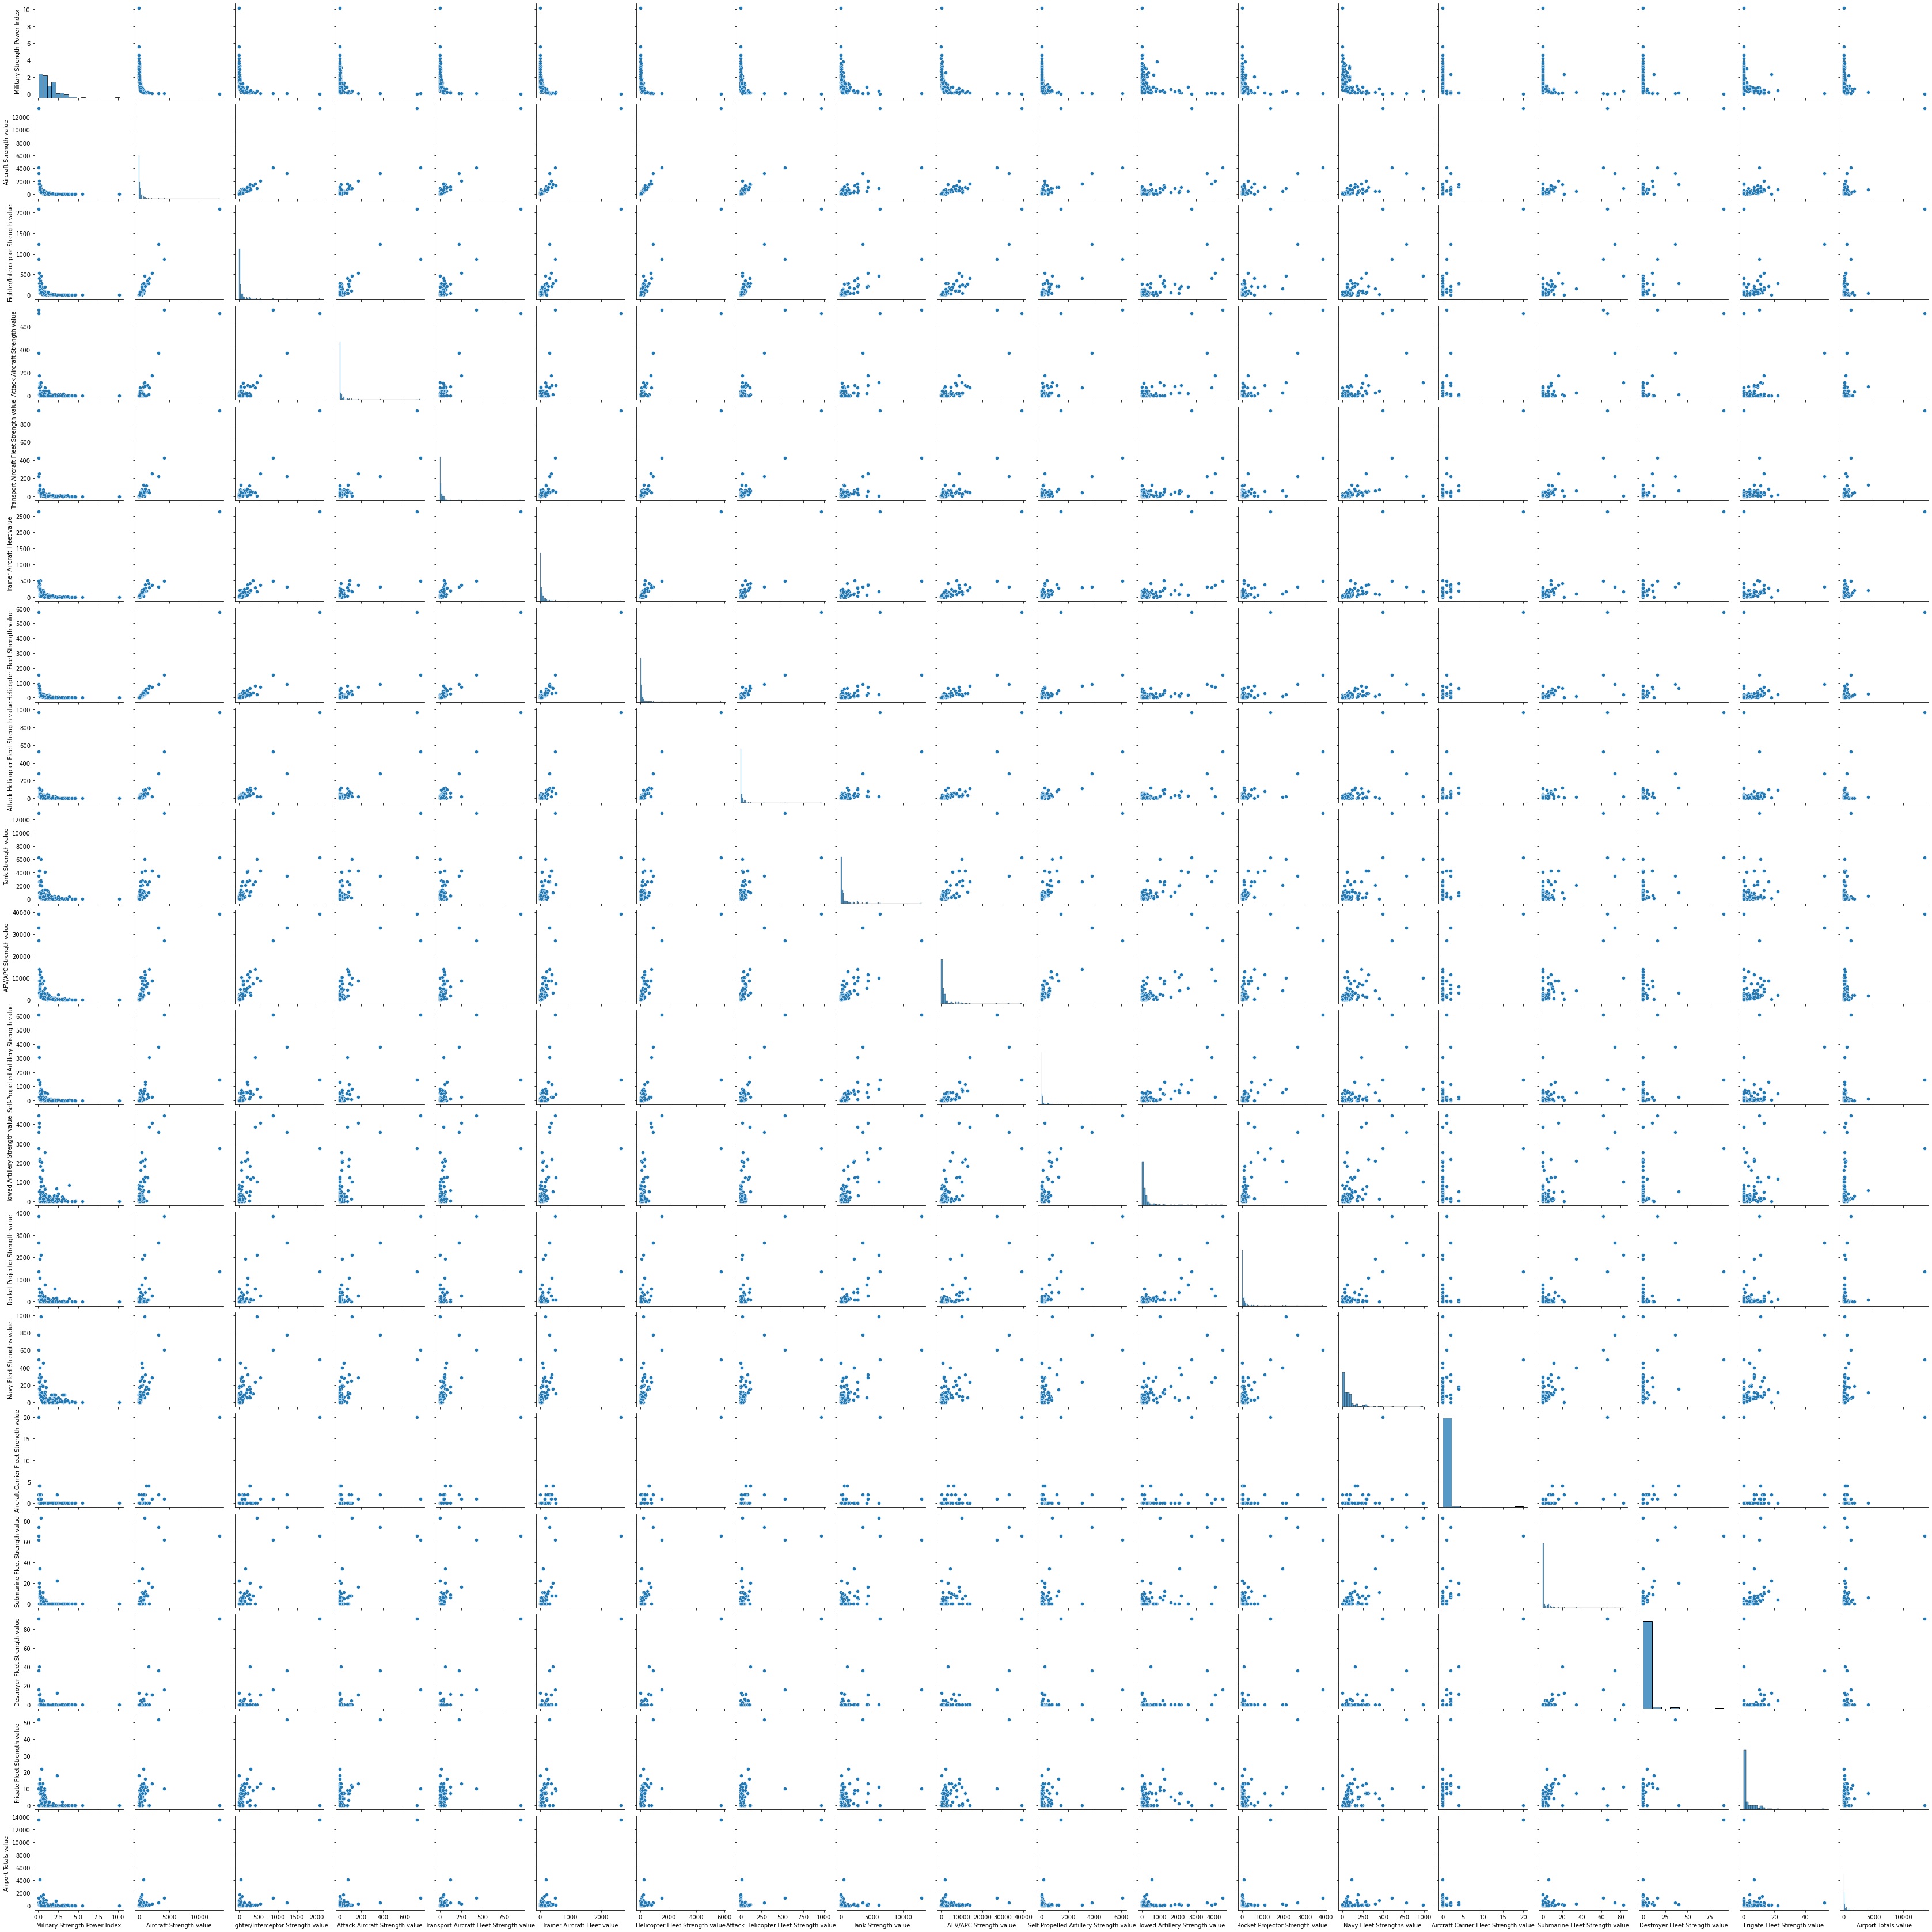

In [337]:
sns.pairplot(df)

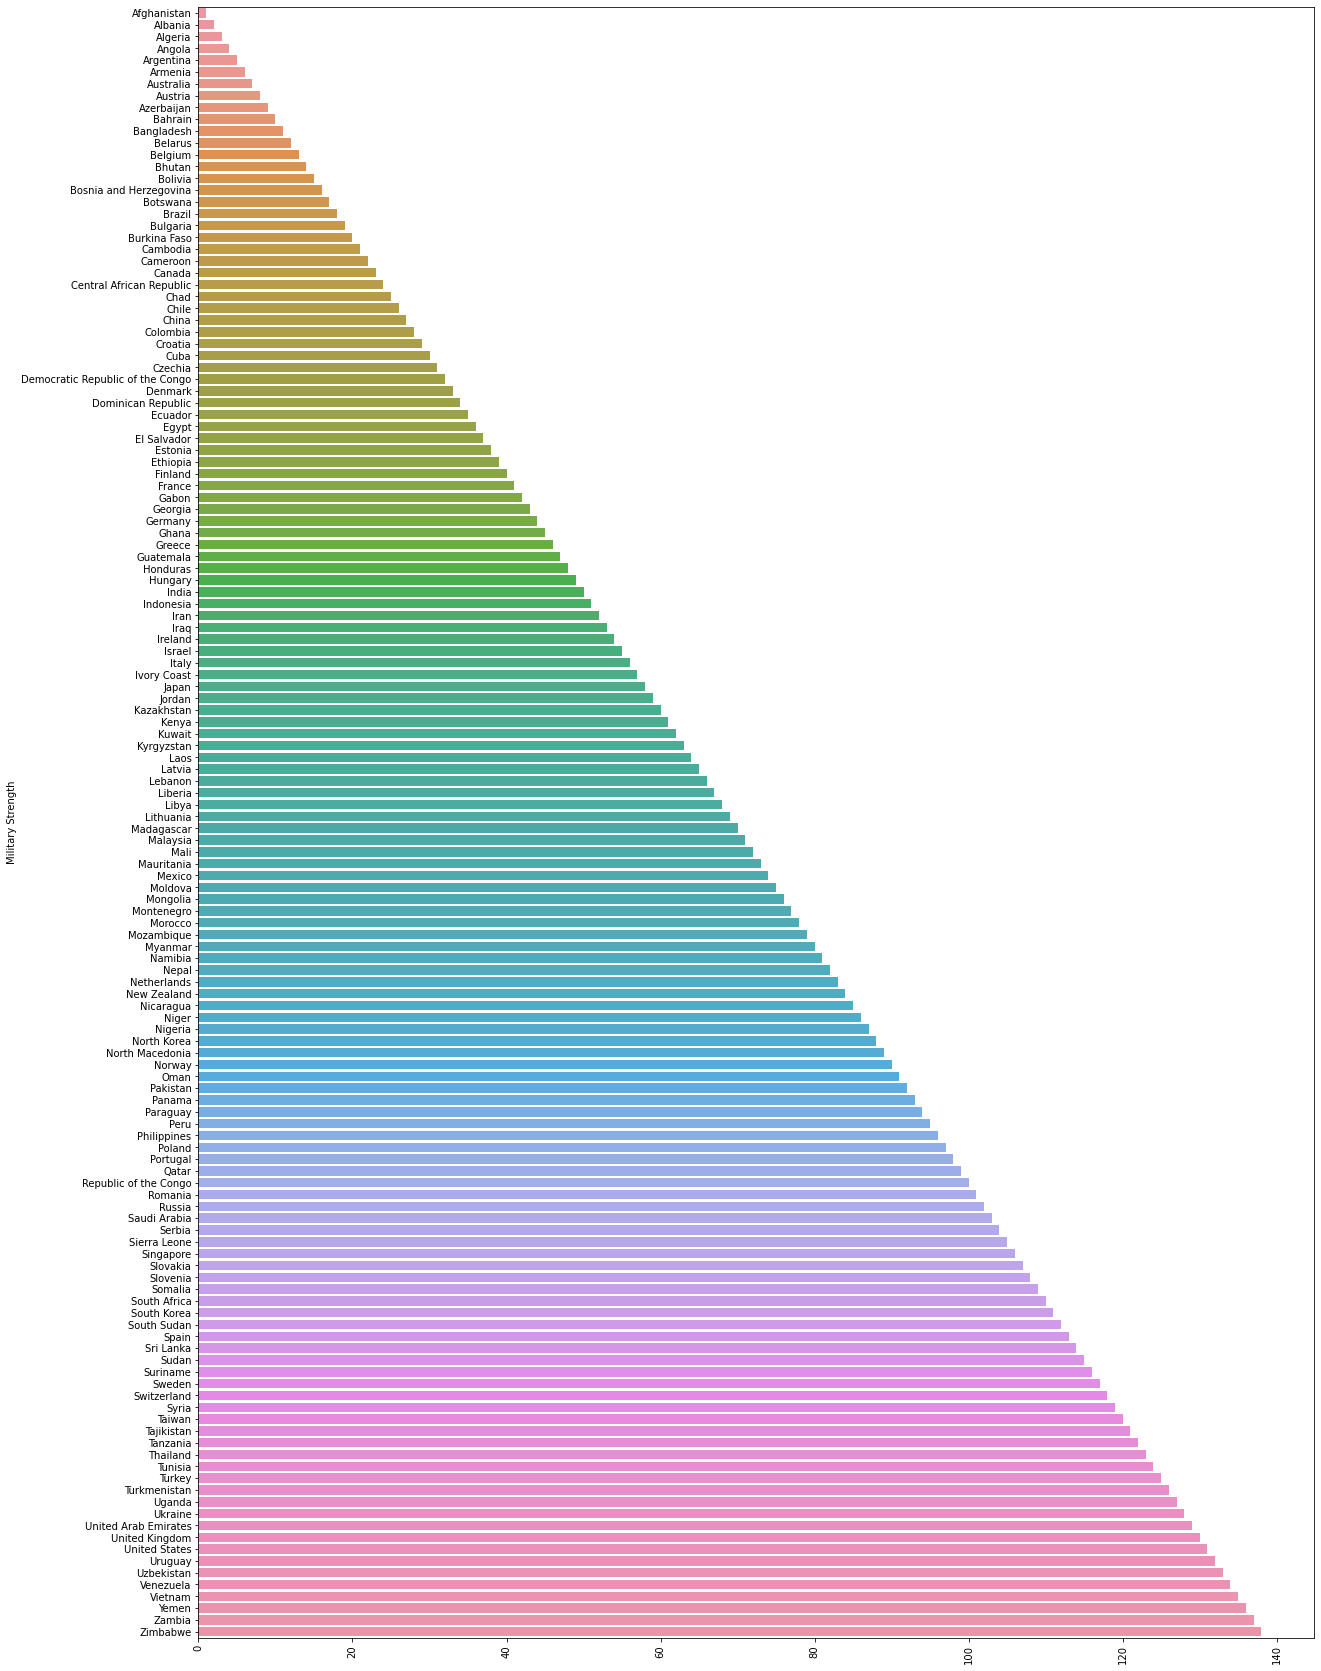

In [363]:
plt.figure(figsize = (20,30))
sns.barplot(y = "Military Strength", x = df.index, data = df, order = df['Military Strength'].values.sort())
plt.xticks(rotation = 90);

In [413]:
import plotly.express as px

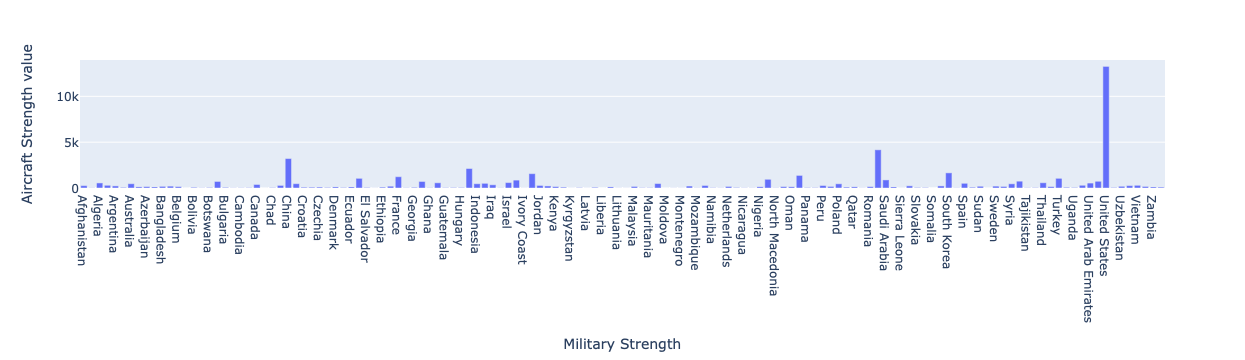

In [417]:
fig = px.bar(df,x= "Military Strength" , y = df["Aircraft Strength value"])
fig.show()

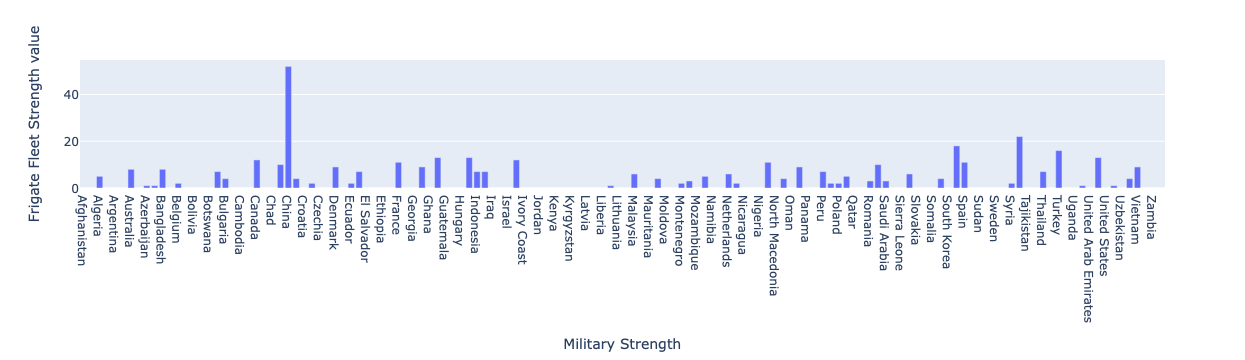

In [420]:
fig = px.bar(df,x= "Military Strength" , y = df['Frigate Fleet Strength value'])
fig.show()

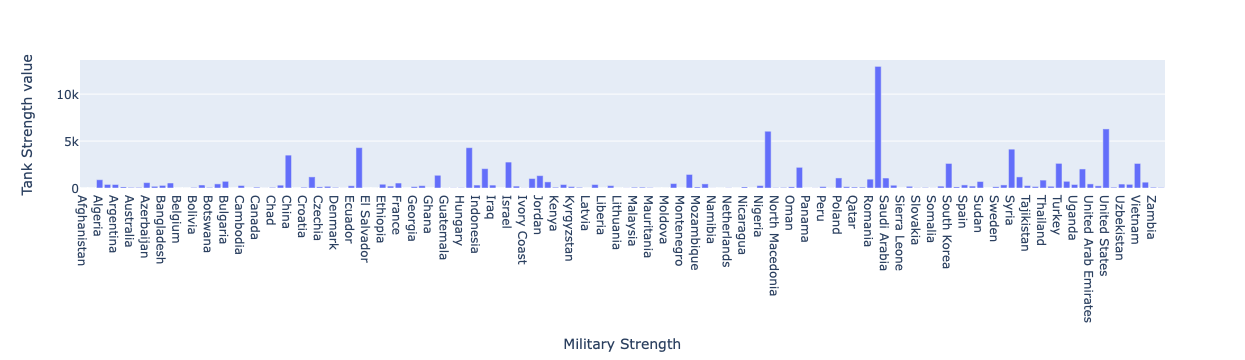

In [421]:
fig = px.bar(df,x= "Military Strength" , y = df['Tank Strength value'])
fig.show()

## Decriptive statistics

In [340]:
df.describe()

Military Strength Power Index  Aircraft Strength value  \
count                        138.000                  138.000   
mean                           1.461                  388.471   
std                            1.324                 1231.982   
min                            0.061                    0.000   
25%                            0.575                   33.000   
50%                            1.034                  111.000   
75%                            2.022                  290.250   
max                           10.168                13264.000   

       Fighter/Interceptor Strength value  Attack Aircraft Strength value  \
count                             138.000                         138.000   
mean                               81.565                          25.761   
std                               230.325                          94.528   
min                                 0.000                           0.000   
25%                                 0.000                           0.000   
50%                                17.000                           0.000   
75%                                60.500                          15.750   
max                              2085.000                         742.000   

       Transport Aircraft Fleet Strength value  Trainer Aircraft Fleet value  \
count                                  138.000                       138.000   
mean                                    30.232                        82.833   
std                                     92.330                       240.804   
min                                      0.000                         0.000   
25%                                      3.000                         4.250   
50%                                      9.000                        26.000   
75%                                     26.000                        79.250   
max                                    945.000                      2643.000   

       Helicopter Fleet Strength value  \
count                          138.000   
mean                           154.065   
std                            520.184   
min                              0.000   
25%                             15.250   
50%                             44.000   
75%                            126.750   
max                           5768.000   

       Attack Helicopter Fleet Strength value  Tank Strength value  \
count                                 138.000              138.000   
mean                                   25.623              646.565   
std                                    97.326             1515.464   
min                                     0.000                0.000   
25%                                     0.000               19.250   
50%                                     2.000              153.000   
75%                                    17.750              436.250   
max                                   967.000            12950.000   

       AFV/APC Strength value  Self-Propelled Artillery Strength value  \
count                 138.000                                  138.000   
mean                 2485.696                                  212.159   
std                  5410.546                                  688.029   
min                     0.000                                    0.000   
25%                   250.250                                    0.000   
50%                   734.500                                   23.000   
75%                  2000.000                                   97.250   
max                 39253.000                                 6083.000   

       Towed Artillery Strength value  Rocket Projector Strength value  \
count                         138.000                          138.000   
mean                          393.978                          156.935   
std                           805.782                          484.381   
min                             0

# Data Preprocessing

In [384]:
X = df.drop(['Military Strength'], axis=1)

In [385]:
X = X.astype('float')

In [387]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 1 to 138
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   Aircraft Strength value                  138 non-null    float64
 2   Fighter/Interceptor Strength value       138 non-null    float64
 3   Attack Aircraft Strength value           138 non-null    float64
 4   Transport Aircraft Fleet Strength value  138 non-null    float64
 5   Trainer Aircraft Fleet value             138 non-null    float64
 6   Helicopter Fleet Strength value          138 non-null    float64
 7   Attack Helicopter Fleet Strength value   138 non-null    float64
 8   Tank Strength value                      138 non-null    float64
 9   AFV/APC Strength value                   138 non-null    float64
 10  Self-Propelled Artillery Strength value  138 non-n

## Scaling

In [425]:
from sklearn.preprocessing import StandardScaler

In [426]:
scaler = StandardScaler()

In [427]:
scaled_X = scaler.fit_transform(X)

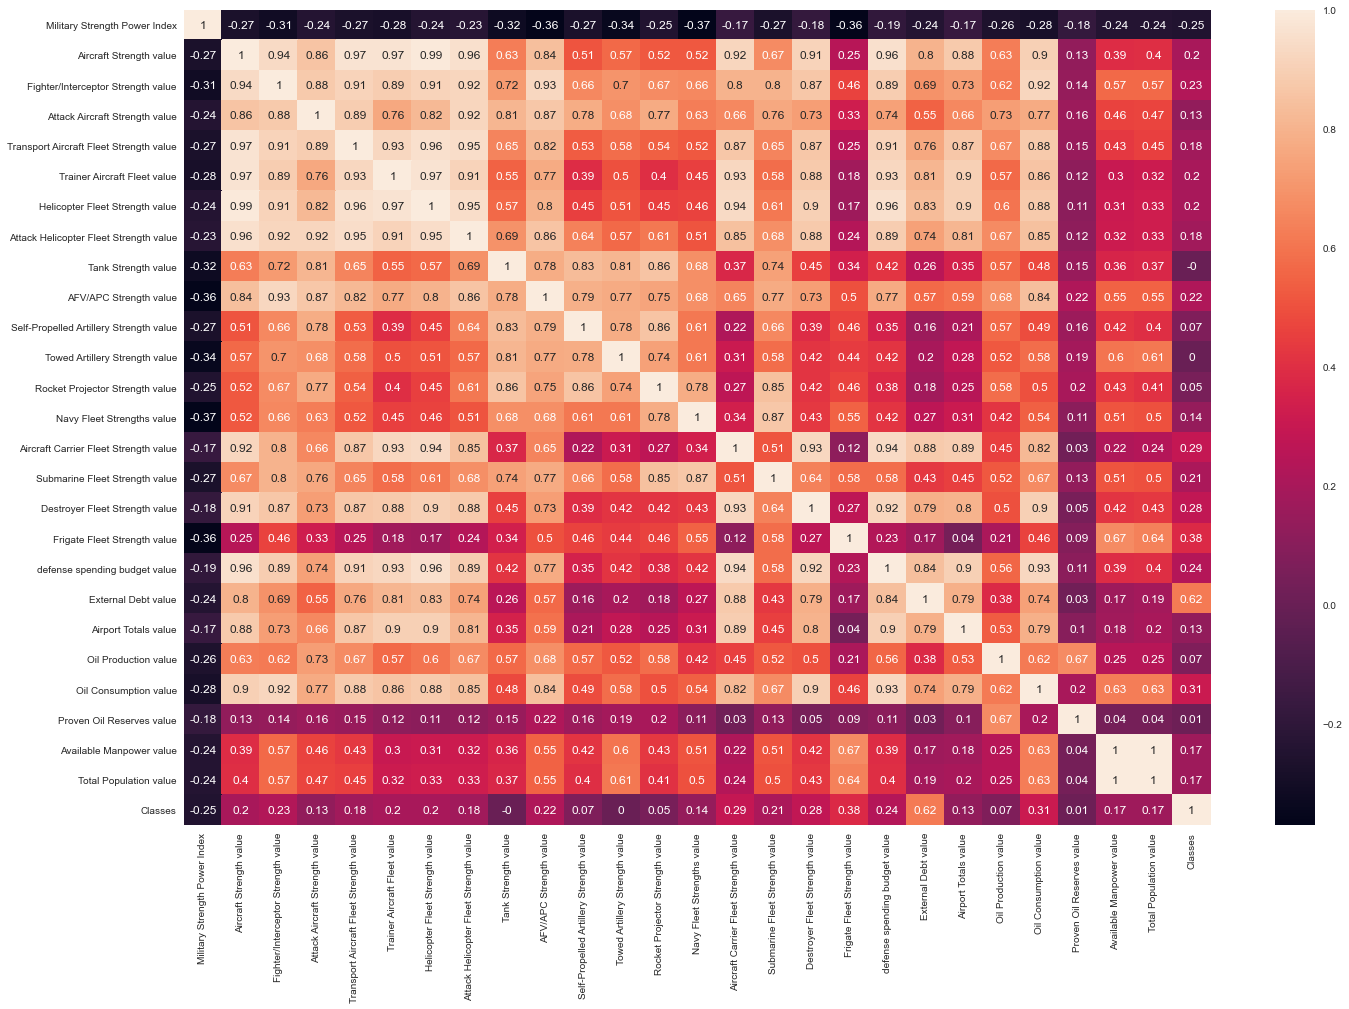

In [428]:
df_scaled_X = pd.DataFrame(scaled_X, columns = X.columns)
plt.figure(figsize = (23, 15))
sns.heatmap(df_scaled_X.corr().round(2), annot = True);

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

X = X.drop("Classes", axis =1)

In [429]:
from pyclustertend import hopkins

In [430]:
X.shape

(138, 27)

In [432]:
hopkins(X, X.shape[0])

0.06744245366889429

## Clustering with K-means

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [436]:
ssd = []

K = range(2,10)                                         

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)                                        
    ssd.append(model.inertia_)

In [437]:
ssd

[1.591709282276745e+26,
 4.208693510098631e+25,
 1.5683101157453748e+25,
 7.956312589673094e+24,
 4.984308976164555e+24,
 2.6142676777381576e+24,
 1.5160985091134827e+24,
 1.1726889374325845e+24]

Text(0.5, 1.0, 'elbow method')

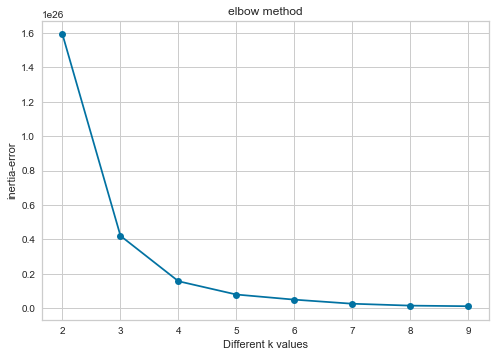

In [438]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [439]:
ssd       # Elbow metoda gore k=3

[1.591709282276745e+26,
 4.208693510098631e+25,
 1.5683101157453748e+25,
 7.956312589673094e+24,
 4.984308976164555e+24,
 2.6142676777381576e+24,
 1.5160985091134827e+24,
 1.1726889374325845e+24]

In [440]:
pd.Series(ssd).diff()

0                                NaN
1   -117083993126688212012498944.000
2    -26403833943532565417689088.000
3     -7726788567780654527283200.000
4     -2972003613508538908803072.000
5     -2370041298426397317922816.000
6     -1098169168624674848899072.000
7      -343409571680898246508544.000
dtype: float64

In [441]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

0
1                             NaN
2 117083993126688212012498944.000
3  26403833943532565417689088.000
4   7726788567780654527283200.000
5   2972003613508538908803072.000
6   2370041298426397317922816.000
7   1098169168624674848899072.000
8    343409571680898246508544.000

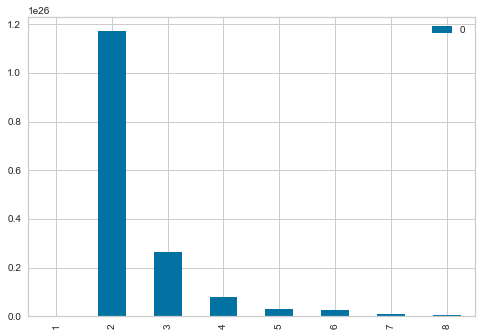

In [442]:
df_diff.plot(kind='bar');

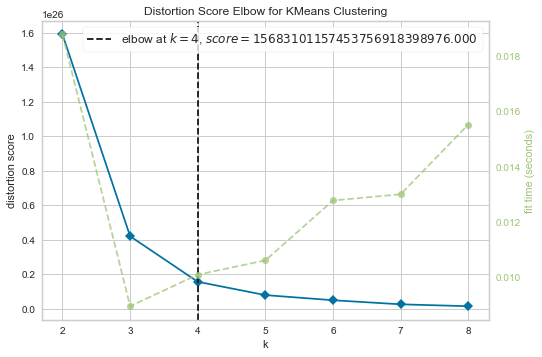

In [443]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

__Yellowbrick' e gore k=4__

### Silhouette analysis

In [444]:
from sklearn.metrics import silhouette_score

In [445]:
silhouette_score(X, K_means_model.labels_)

0.8675195540884069

In [446]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.9227153206161364
For n_clusters=3, the silhouette score is 0.8995442950406765
For n_clusters=4, the silhouette score is 0.8671436271577668
For n_clusters=5, the silhouette score is 0.8675195540884069
For n_clusters=6, the silhouette score is 0.7789462746208776
For n_clusters=7, the silhouette score is 0.7817947547149938
For n_clusters=8, the silhouette score is 0.784742362468917


### Building the model based on the optimal number of clusters

In [447]:
model = KMeans(n_clusters=4)
model.fit(X)

KMeans(n_clusters=4)

In [448]:
model.inertia_

1.5683101157453748e+25

In [450]:
df["cluster"] = model.labels_

In [449]:
model.labels_

array([0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

### Model Building and label visualisation

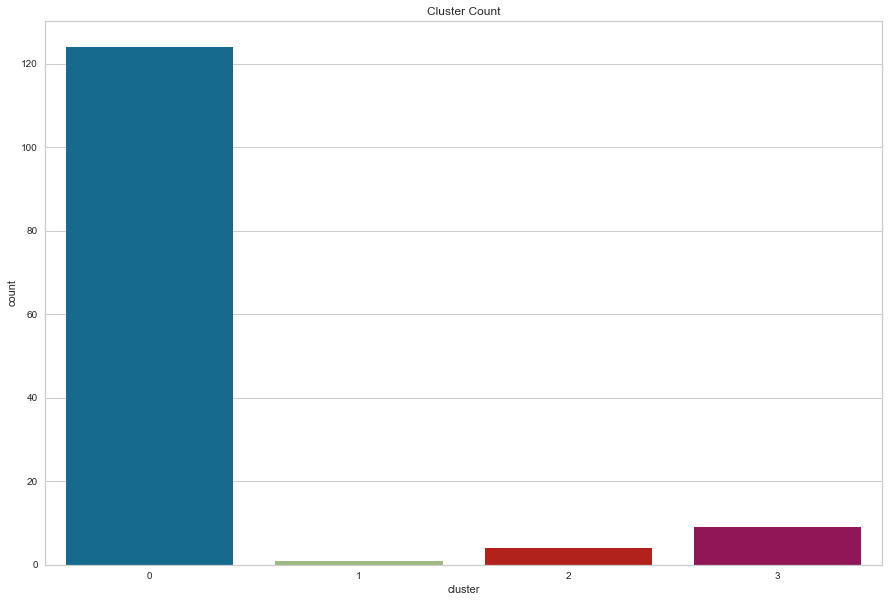

In [453]:
plt.figure(figsize=(15,10))
plt.title("Cluster Count")
ax = sns.countplot(x = df.cluster)


plt.show();

### Evaluate 

In [454]:
from sklearn.metrics import silhouette_score

In [455]:
silhouette_score(X, model.labels_)

0.8671436271577668

In [456]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.9227153206161364
For n_clusters=3, the silhouette score is 0.8995442950406765
For n_clusters=4, the silhouette score is 0.8671436271577668
For n_clusters=5, the silhouette score is 0.8675195540884069
For n_clusters=6, the silhouette score is 0.7789462746208776
For n_clusters=7, the silhouette score is 0.7817947547149938
For n_clusters=8, the silhouette score is 0.784742362468917


## Hierarchical Clustering

In [457]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Dendogram

In [458]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

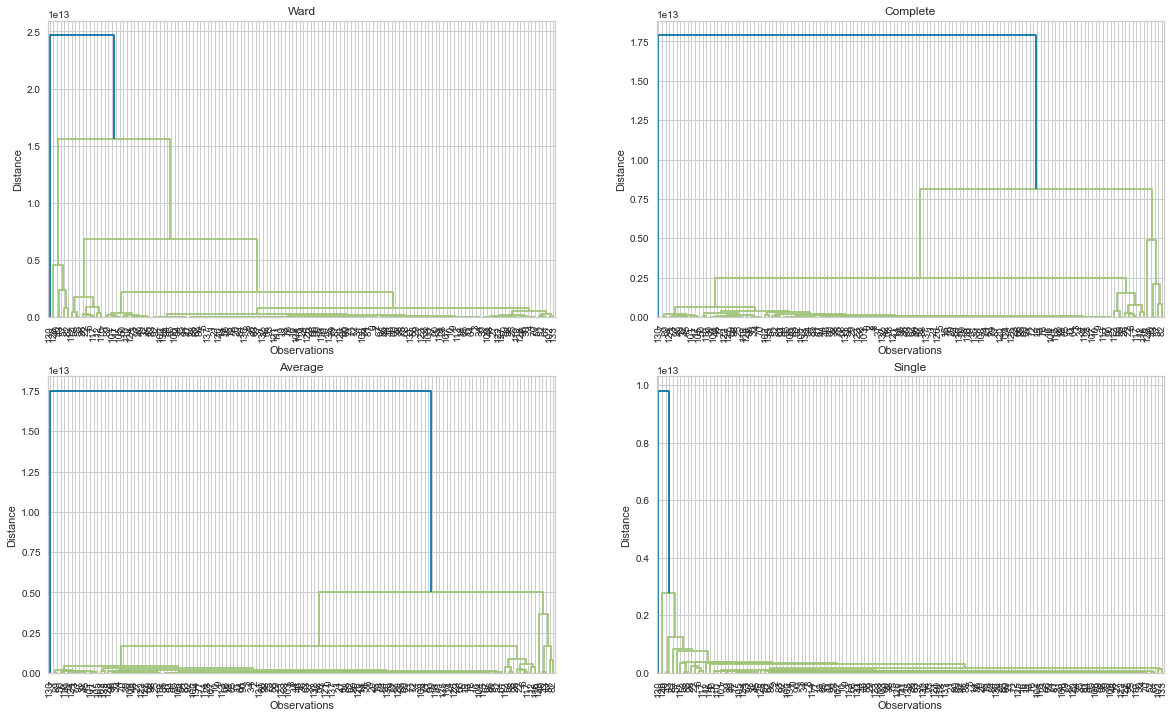

In [459]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

### Model Building and label visualisation

In [462]:
from sklearn.cluster import AgglomerativeClustering

In [465]:
final_model = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")

In [466]:
final_model.fit_predict(X)

array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 2,
       2, 2, 2, 2, 2, 2])

In [469]:
df["cluster_new"] = final_model.labels_

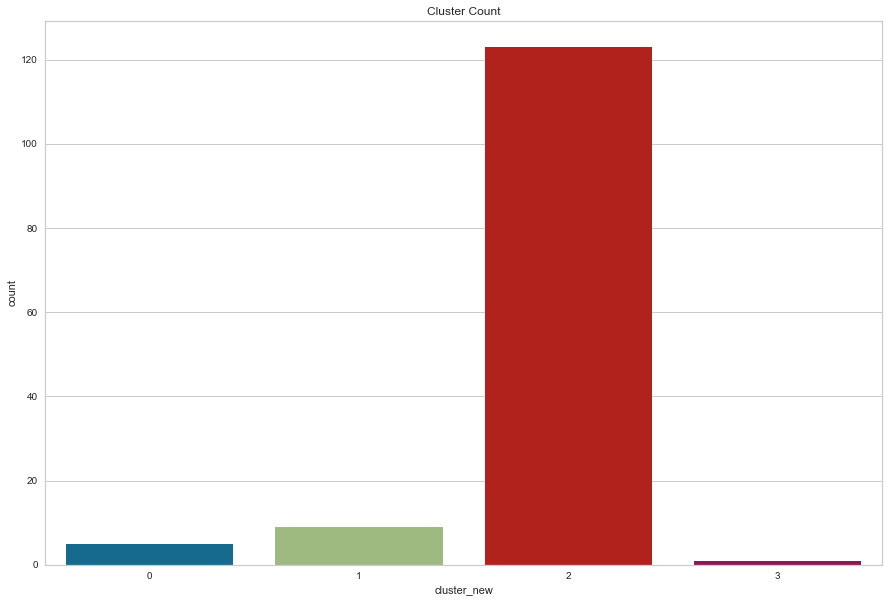

In [472]:
plt.figure(figsize=(15,10))
plt.title("Cluster Count")
ax = sns.countplot(x = df.cluster_new)

plt.show();

### Evaluate 

In [473]:
silhouette_score(X, df.cluster_new)

0.8529367641942478